## 1.파일 다운로드

In [388]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [389]:
!git clone https://github.com/Soyoung-Yoon/data_03

fatal: destination path 'data_03' already exists and is not an empty directory.


## 2.Colab에서 한글 폰트 사용하기

In [390]:
### [230417]변경안내
# colab에서 matplotlib의 버전이 변경되면서
# koreanize_matplotlib 사용이 가능해 졌습니다.
# 아래의 설치 후, import koreanize_matplotlib 를 한 뒤 사용하시면 됩니다.

In [391]:
!pip install koreanize-matplotlib

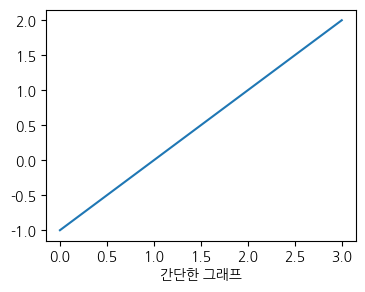

In [392]:
# 사용 예시!
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

In [393]:
# <그래프 그리기 전용> - 사용할 데이터 프레임 만들기
# 1. 파일 다운로드
# 2. Colab에서 한글 폰트 사용하시 실행
# 3. 아래의 데이터 프레임 만들기 실행
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import koreanize_matplotlib

warnings.filterwarnings('ignore')

df = pd.read_csv('./data_03/bread_data.csv', encoding='cp949', dtype={'건물소유구분명': object, '전통업소지정번호': object})
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
bread['구명'] = bread['소재지전체주소'].str.split().str[1]
bread['동명'] = bread['소재지전체주소'].str.split().str[2]
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')
bread = bread.drop(columns=['소재지전체주소', '업태구분명'])
bread = bread.rename(columns={'상세영업상태코드': '상태코드'})
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
nyear = 2021
bread.loc[bread['상태코드']==1,'영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드']==2,'영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
func = lambda x : (nyear - x['설립년도'] + 1) if x['상태코드']==1 else (x['폐업년도'] - x['설립년도'] + 1)
bread['영업기간'] = bread.apply(func, axis=1)
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().T
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp = pd.concat([temp1, temp2], axis=0, join='outer')
temp = temp.fillna(0).astype('int64')
temp
# [4-25]로 가서 그래프 실행

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,0
count,1,1,1,11,5,10,20,12,9,5,...,431,474,572,644,623,538,546,502,433,0
count,0,0,0,0,0,0,0,0,0,0,...,374,396,447,469,612,518,514,515,349,3955


## 3.제과점 오픈 프로젝트

In [394]:
# [4-0] 사용라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1.파일 읽어오기
- csv 파일 : pd.read_csv('파일이름', encoding='cp949', low_memory=False)
   - encoding='cp949' : 한글이 포함되어 있는 경우 encoding 방식을 지정
   - low_memory=False : column에 여러 type의 데이터가 섞여 있으면 DtypeWarning이 발생하며 이때, dtype option으로 타입을 명시해주거나 low_memory=False를 사용한다.


In [395]:
# [4-1] 제과점에 대한 파일 './data_03/bread_data.csv'을
# encoding='cp949' 를 사용하여 읽어와 df라는 이름을 붙인다
# low_memory=False 또는 dtype={'건물소유구분명': object, '전통업소지정번호': object}를 사용하여 Warning를 제거할 수 있음
df = pd.read_csv('./data_03/bread_data.csv',encoding='cp949',dtype={'건물소유구분명': object, '전통업소지정번호': object})
df.dtypes.to_frame().reset_index().head()

,index,0
0,번호,int64
1,개방서비스명,object
2,개방서비스id,object
3,개방자치단체코드,int64
4,관리번호,object


### 3-2.데이터 구조 확인
- DataFrame.shape : 데이터 프레임의 행, 열의 수를 tuple로 반환
- DataFrame.head(n=5) : 처음부터 n개 행의 데이터 가져오기
- DataFrame.tail(n=5) : 마지막 n개 행의 데이터 가져오기
- DataFrame.info(memory_usage='deep') : 데이터 프레임의 row 개수 및 각 column의 Non null, dtype 정보 및 메모리 사용량을 확인함

In [396]:
# [4-2] df의 행, 열의 개수를 확인한다
df.shape

(52680, 48)

In [397]:
# [4-3] df의 첫 1개 열을 출력해 확인한다
df.head(1)

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,제과점영업,07_22_18_P,3600000,3600000-121-2013-00002,20130201,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,146.4,NaN,NaN,NaN,NaN


In [398]:
# [4-4] df의 행, 열에 대한 개수, 각 열 별 데이터 개수 및 dtype,
# 메모리 사용량을 확인합니다.
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52680 entries, 0 to 52679
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           52680 non-null  int64  
 1   개방서비스명       52680 non-null  object 
 2   개방서비스id      52680 non-null  object 
 3   개방자치단체코드     52680 non-null  int64  
 4   관리번호         52680 non-null  object 
 5   인허가일자        52680 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     52680 non-null  int64  
 8   영업상태명        52680 non-null  object 
 9   상세영업상태코드     52680 non-null  int64  
 10  상세영업상태명      52680 non-null  object 
 11  폐업일자         33669 non-null  float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        31967 non-null  object 
 16  소재지면적        49047 non-null  object 
 17  소재지우편번호      50885 non-null  float64
 18  소재지전체주소      52513 non-null  object 
 19  도로명전

DataFrame의 한 개의 column은 Series이다.
- DataFrame[컬럼명] : 컬럼 1개를 Series로 반환함
- DataFrame[[컬럼명1, 컬럼명2, ...]] : 컬럼 목록에 있는 컬럼을 가져옴
    - 컬럼 목록에 1개의 컬럼만 있어도 DataFrame이 반환됨

Series.value_counts() : 데이터 별 개수를 Series로 반환
- NA Value가 있다면 불포함

In [399]:
# [4-5] df의 '상세영업상태명'에 대해 값별 개수를 구합니다.
df['상세영업상태명'].value_counts()

,count
상세영업상태명,
폐업,33669
영업,19011


In [400]:
# [4-6] df의 '상세영업상태코드'에 대해 값별 개수를 구합니다.
#1:영업,2:폐업
df['상세영업상태코드'].value_counts()

,count
상세영업상태코드,
2,33669
1,19011


In [401]:
# [4-7] df의 컬럼 중에
# '인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명'만 가져옵니다.
# 이름을 bread로 정하고, 처음부터 3개 행을 출력해 봅니다.
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
0,20130201,1,NaN,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업
1,20130318,1,NaN,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업
2,20130417,1,NaN,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업


### 3-3.파생정보 추가

Series의 str Accessor 사용
- 세부 내용 : https://pandas.pydata.org/docs/reference/series.html#string-handling
- Series.str.split() : whitespace(공백, 탭 등)을 기준으로 문자열 분리
    - 예)  ‘서울특별시 종로구 …’  => [서울특별시, 종로구, …]
- Series.str[0] : Series가 여러 개의 요소가 있는 경우 그 첫 번째 요소

Series.unique() : 중복 데이터의 제거 후 배열로 반환, NA Value가 있다면 포함

In [402]:
# [4-8] bread 의 '소재지전체주소' 중 시/도에 대한 정보(목록)를 추출합니다.
bread['소재지전체주소'].str.split().str[0].head()

,소재지전체주소
0,광주광역시
1,광주광역시
2,광주광역시
3,광주광역시
4,광주광역시


Boolean indexing 사용하여 조건에 맞는 데이터 가져오기
- DataFrame.loc[조건, :]
- DataFrame[조건]
- 조건은 boolean dtype이어야 하며 행의 수와 같아야 함
- 복잡한 조건 작성
    - (조건1) | (조건2)  : 조건1 또는 조건2를 만족하는 데이터
    - (조건1) & (조건2)  : 조건1, 조건2 모두 만족하는 데이터
    - ~(조건) : 조건이 거짓인 데이터

In [403]:
# [4-9] bread에서 소재지전체주소의 처음이 '서울특별시'이면서,
# '업태구분명'이 '제과점영업'인 것만 추출합니다.
bread = bread[(bread['소재지전체주소'].str.split().str[0]=='서울특별시') & (bread['업태구분명'] == '제과점영업')]
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
1055,20010713,1,NaN,"서울특별시 은평구 대조동 179-8 1,2층",파리바게뜨(역촌역점),제과점영업
1056,20030507,1,NaN,서울특별시 은평구 갈현동 508-4번지 1층,파리바게뜨,제과점영업
1057,20021011,1,NaN,서울특별시 은평구 녹번동 278-1번지 (108호),신라명과(역촌현대점),제과점영업


In [404]:
# [4-10] df, bread의 행/열 정보를 확인합니다
print(df.shape,bread.shape)

(52680, 48) (12052, 6)


DataFrame에 새로운 컬럼 추가
- DataFrame['컬럼명'] = 데이터
- 데이터의 개수는 기존 다른 컬럼의 행 개수와 같아야 함


In [405]:
# [4-11] bread의 '소재지전체주소'에서 '구명', '동명'을 추출하여
# bread에 새로운 컬럼으로 등록합니다.
bread['구명'] = bread['소재지전체주소'].str.split().str[1]
bread['동명'] = bread['소재지전체주소'].str.split().str[2]
# bread의 컬럼명을 출력해 '구명', '동명'이 추가되었는지 확인함
bread.columns

Index(['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명', '구명', '동명'], dtype='object')

In [406]:
bread.to_csv('bread_t1.csv',index=False)

### 3-4.결측치 확인/처리

결측치는 값이 없음을 나타냄
- NaN, NaT, None 등으로 표기되며, NA Value, Missing Value 라고 함

결측치 확인
   - DataFrame.isna() : 결측치에 대해 True, 아니면 False
   - DataFrame.isnull() : DataFrame.isna()와 동일함
   - DataFrame.notna() : 결측치가 아닌 것에 대해 True, 결측치면 False
   - DataFrame.notnull() : DataFrame.isnull()과 동일함
   - Series에도 결측치 확인을 위한 isna() ~ notnull()의 메서드 있음

DataFrame.isna().sum() : 결측치에 대해 컬럼별 개수

In [407]:
# [4-12] bread의 각 컬럼별 결측치의 개수를 확인합니다.
bread.isna().sum()

,0
인허가일자,0
상세영업상태코드,0
폐업일자,3955
소재지전체주소,0
사업장명,0
업태구분명,0
구명,0
동명,0


결측치 채우기
- DataFrame.fillna(값) : 결측치를 특정 값으로 채움

데이터 타입 변경 방법
- Series.astype(타입)
- 타입 표시 방법 : 'int', 'int32', 'int64', 'float', 'str', 'category',  ... 등의 문자열로 지정
- np.int16, np.float32, np.datetime64, ... 등의 numpy 타입으로 지정
- numpy 타입으로 지정하기 위해서는  ```import numpy as np```  를 먼저 실행하여야 함

In [408]:
import pandas as pd
df = pd.read_csv('./data_03/bread_data.csv',
                 encoding='cp949',
                 dtype={'건물소유구분명': object, '전통업소지정번호': object})
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
temp = bread['소재지전체주소'].str.split()
bread['구명'] = temp.str[1]
bread['동명'] = temp.str[2]
print(bread)

          인허가일자  상세영업상태코드        폐업일자                              소재지전체주소  \
1055   20010713         1         NaN             서울특별시 은평구 대조동 179-8 1,2층   
1056   20030507         1         NaN             서울특별시 은평구 갈현동 508-4번지 1층   
1057   20021011         1         NaN         서울특별시 은평구 녹번동 278-1번지 (108호)   
1058   20011015         1         NaN  서울특별시 은평구 불광동 631-1번지 (지하1층)대호상가아파트   
1059   20050406         1         NaN                 서울특별시 중랑구 중화동 288-27   
...         ...       ...         ...                                  ...   
52664  20201218         2  20201225.0              서울특별시 서초구 반포동 19-3 지하1층   
52665  20201218         2  20201225.0      서울특별시 서초구 반포동 19-3 신세계 강남점 지하1층   
52670  20210119         2  20210220.0       서울특별시 서초구 반포동 19-3 신세계백화점 지하1층   
52672  20210125         2  20210215.0           서울특별시 강남구 압구정동 494 갤러리아백화점   
52673  20201208         2  20210315.0                서울특별시 동작구 사당동 1037-17   

                  사업장명  업태구분명   구명    동명  
1055       파리바게뜨(역촌역

In [409]:
# [4-13] bread의 '폐업일자'에 대해 결측치인 것을 0.0으로 채우기 한 뒤,
# 데이터 타입을 'int64'로 수정합니다.
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')
bread.dtypes

,0
인허가일자,int64
상세영업상태코드,int64
폐업일자,int64
소재지전체주소,object
사업장명,object
업태구분명,object
구명,object
동명,object


In [410]:
# [4-14] bread의 전체 결측치의 개수를 하나의 정수로 확인합니다.
bread.isna().sum().sum()

0

DataFrame에서 컬럼을 제거 함
- DataFrame.drop(columns=['컬럼명1', '컬럼명2', ...])
- DataFrame.drop(['컬럼명1', '컬럼명2', ...], axis=1)


In [411]:
# [4-15] bread에서 '소재지전체주소' 및 '업태구분명' 컬럼을 제거한 뒤, shape을 확인합니다.
bread = bread.drop(columns=['소재지전체주소','업태구분명'])
bread.shape

(12052, 6)

In [412]:
# [4-16] bread의 첫 3개 행을 확인합니다.
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,사업장명,구명,동명
1055,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1056,20030507,1,0,파리바게뜨,은평구,갈현동
1057,20021011,1,0,신라명과(역촌현대점),은평구,녹번동


컬럼이름 변경하기
- DataFrame.rename(columns={'변경전이름':'변경후이름', ...})
- DataFrame.rename({'변경전이름':'변경후이름', ...}, axis=1)

In [413]:
# [4-17] bread의 '상세영업상태코드'라는 컬럼명을 '상태코드'로 변경한 뒤,
# 첫 2개의 행을 확인합니다.
bread = bread.rename(columns = {'상세영업상태코드':'상태코드'})
bread.head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
1055,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1056,20030507,1,0,파리바게뜨,은평구,갈현동


CSV 파일로 저장하기
- DataFrame.to_csv('파일이름', index=False) : index를 제외한 내용을 csv 파일로 저장함

In [414]:
# [4-18] bread를 'bread_after.csv' 파일로 index를 제외하고 저장합니다.
bread.to_csv('bread_after.csv',index=False)

In [415]:
# [4-19] 'bread_after.csv' 파일을 읽어 bread라는 이름으로 저장합니다.
bread = pd.read_csv('bread_after.csv')

In [416]:
bread.head(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1,20030507,1,0,파리바게뜨,은평구,갈현동


### 3-5.설립년도,폐업년도 분석

Series의 연산
- Series는 스칼라값과 연산 시 각 값과 스칼라 값의 연산이 이루어짐
- 결과는 Series가 됨

In [417]:
# [4-20] bread에 '설립년도' 및 '폐업년도' 컬럼을 추가합니다.
# '인허가일자'//10000, '폐업일자 // 10000 을 사용하여 구합니다.
# 두 개의 컬럼이 추가된 bread의 첫 2개 행을 확인합니다.
# year = bread['인허가일자']//10000
# month = bread['인허가일자']//100 % 100
# day = bread['인허가일자'] % 100
bread['설립년도'] = bread['인허가일자']//10000
bread['폐업년도'] = bread['폐업일자']//10000
bread.tail(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도
12050,20210125,2,20210215,유한회사 카페노티드(한시적),강남구,압구정동,2021,2021
12051,20201208,2,20210315,고오급 빵집,동작구,사당동,2020,2021


In [418]:
# [4-21] bread에 '영업기간' 컬럼을 추가합니다
# '영업기간'은 '상태코드'가 1(=영업)인 경우 2021 - 설립년도 -1
# '상태코드'가 2(=폐업)인 경우 폐업년도 - 설립년도 + 1로 계산합니다.
nyear = 2021
bread.loc[bread['상태코드'] == 1,'영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드'] == 2,'영업기간'] = bread['폐업년도'] - bread['설립년도'] +1
bread.tail(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
12049,20210119,2,20210220,리암스(Liam's),서초구,반포동,2021,2021,1.0
12050,20210125,2,20210215,유한회사 카페노티드(한시적),강남구,압구정동,2021,2021,1.0
12051,20201208,2,20210315,고오급 빵집,동작구,사당동,2020,2021,2.0


Series를 DataFrame으로 만들기
- pd.DataFrame(Series)
- Series.to_frame()

DataFrame의 index 정렬하기
- DataFrame.sort_index() : 오름차순 정렬
- DataFrame.sort_index(ascending=False) : 내림차순 정렬

DataFrame의 전치행렬 구하기
- DataFrame.T


In [420]:
# [4-22] bread의 '설립년도'별 데이터 수를 구해 년도별로 정렬하고,
# DataFrame으로 변경하여 전치행렬을 구해 temp1 이름을 부여해 출력합니다.
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().T
temp1

설립년도,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1,1,1,11,5,10,20,12,9,5,...,378,431,474,572,644,623,538,546,502,433


In [421]:
# [4-23] bread의 '폐업년도'별 데이터 수를 구해 년도별로 정렬하고,
# DataFrame으로 변경하여 전치행렬을 구해 temp2 이름을 부여해 출력합니다.
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp2

폐업년도,0,1984,1988,1989,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,3955,1,2,1,33,4,35,29,16,24,...,475,374,396,447,469,612,518,514,515,349



여러 개의 데이터프레임 합치기
- pd.concat([DataFrame1, DataFrame2, ...])
- DataFrame의 목록에 있는 순서대로 위 -> 아래 방향으로 합쳐 한 개 DataFrame 반환,

In [422]:
# [4-23] temp1, temp2를 합쳐서 temp라고 이름 붙입니다.
temp = pd.concat([temp1,temp2],axis=0,join='outer')
temp

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,0
count,1.0,1.0,1.0,11.0,5.0,10.0,20.0,12.0,9.0,5.0,...,431,474,572,644,623,538,546,502,433,NaN
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,374,396,447,469,612,518,514,515,349,3955.0


In [423]:
# [4-24] temp의 결측치를 0으로 채우기 한 뒤, 'int64'로 변경합니다.
temp.fillna(0).astype('int64')

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,0
count,1,1,1,11,5,10,20,12,9,5,...,431,474,572,644,623,538,546,502,433,0
count,0,0,0,0,0,0,0,0,0,0,...,374,396,447,469,612,518,514,515,349,3955


### 3-6.평균 영업기간 분석

특정 문자열이 포함된 행 가져오기
- Series.str.contains(문자열) : 문자열이 포함된 행은 True, 아니면 False인 Series 반환
- DataFrame.loc[조건, :] : 조건이 True인 행만 가져오기

In [424]:
# [4-26] bread에서 '사업장명' 컬럼을 사용하여
# '파리바게트', '파리바게뜨' 이름인 곳을 뽑아 paris로 이름 붙입니다.
#bread['사업장명'].str.contains(['파리바게트', '파리바게뜨'])
paris = bread.loc[bread['사업장명'].str.contains('파리바게'),:]
paris.head(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동,2001,0,21.0
1,20030507,1,0,파리바게뜨,은평구,갈현동,2003,0,19.0
6,20060417,1,0,파리바게뜨(우림시장점),중랑구,망우동,2006,0,16.0


In [425]:
# [4-27] bread에서 '사업장명' 컬럼을 사용하여
# '뚜레쥬르' 이름인 곳을 뽑아 tous로 이름 붙입니다.
tous = bread.loc[bread['사업장명'].str.contains('뚜레쥬르'),:]
tous.head(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
5,20050412,1,0,뚜레쥬르,중랑구,신내동,2005,0,17.0
7,20060822,1,0,뚜레쥬르사가정역점,중랑구,면목동,2006,0,16.0
14,20070416,1,0,뚜레쥬르용마산역점,중랑구,면목동,2007,0,15.0


통계값 알아보기
- Series.count() : 개수
- Series.sum() : 합계
- Series.mean() : 평균
- Series.std() : 표준편차
- Series.var() : 분산
- Series.median() : 중앙값
- Series.mode() : 최빈값
- Series.cumsum() : 누적합
- Series.quantile([0.25, 05, 0.75]) : 분위수

In [456]:
# [4-28] 설립년도가 2000년 이후이면서 영업 중인 곳의 영업기간 정보를 구합니다.
# 설립년도>2000 and 영업중,영업중인 곳의 영업기간 정보
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.
temp1 = paris.loc[(paris['설립년도'] >= 2000) & (paris['상태코드'] == 1),'영업기간']
temp2 = tous.loc[(tous['설립년도'] >= 2000) & (tous['상태코드'] == 1),'영업기간']
# temp1, temp2의 평균을 구해 이름을 comp로 하는 DataFrame으로 만듭니다.
# index => ['파리바게트', '뚜레쥬르'], columns => ['영업']
s = pd.Series([temp1.mean(),temp2.mean()],index=['파리바케트','뚜레쥬르'])
comp = pd.DataFrame(s,columns=['영업'])
comp

,영업
파리바케트,12.357022
뚜레쥬르,9.796296


In [458]:
# [4-29] 설립년도 2000년 이후이면서 폐업한 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.
temp1 = paris.loc[(paris['설립년도'] >= 2000 ) & (paris['상태코드']==2),'영업기간']
temp2 = tous.loc[(tous['설립년도'] >= 2000 ) & (tous['상태코드']==2),'영업기간']
# temp1, temp2의 평균을 구해 comp에 '폐업' 컬럼으로 추가합니다.
comp['폐업'] = [temp1.mean(),temp2.mean()]
comp

,영업,폐업
파리바케트,12.357022,7.712687
뚜레쥬르,9.796296,7.309028


In [464]:
# [4-30] 파리바게트, 뚜레쥬르가 아닌 다른 사업장에 대한 정보를 찾아 other로 이름 붙입니다.
condition1 = bread['사업장명'].str.contains('파리바게')
condition2 = bread['사업장명'].str.contains('뚜레쥬르')
other = bread.loc[~(condition1|condition2),:]
# other의 행, 열 정보를 확인합니다.
other.shape

(10407, 9)

In [484]:
# [4-31] other의 2000년 이후 설립된 곳의 영업, 폐업 사업장을 구한 뒤
# temp1, temp2 이름을 붙입니다.
temp1 = other.loc[(other['설립년도'] >= 2000) & (other['상태코드'] ==1),'영업기간']
temp2 = other.loc[(other['설립년도'] >= 2000) & (other['상태코드']==2),'영업기간']
# temp1, temp2의 평균을 구해 comp 에 '나머지' 행으로 추가합니다.
temp = pd.DataFrame([[temp1.mean(),temp2.mean()]],index = ['나머지'],columns=['영업','폐업'])
comp = pd.concat([comp,temp])
comp

# DataFrame.append 는 pandas 버전이 높아져서 pd.concat()을 사용해야 합니다.
#comp = pd.concat([comp, temp])  # 를 사용합니다.

,영업,폐업
파리바케트,12.357022,7.712687
뚜레쥬르,9.796296,7.309028
나머지,6.332259,4.619193


### 3-7.폐업비율 분석


In [522]:
# [4-32] paris에서 영업 중인 곳에 대해 '시군구명'별 개수를 구해 DataFrame으로 변환하고
# temp로 이름 붙인 뒤, 첫 2개 행을 출력한다
temp = paris.loc[paris['상태코드']==1,'구명'].value_counts().to_frame()
temp.head(2)

,count
구명,
강남구,59
송파구,49


 DataFrame.reset_index()
 - index의 내용을 columns로 이동함

In [530]:
# [4-33] paris에서 폐업한 곳에 대해 '구명'별 개수를 구해
# temp에 '폐업'이라는 컬럼으로 추가하고,
# reset_index()를 사용하여 index를 columns로 사용되도록 한다. (temp2로 다시 저장)
temp['폐업'] = paris.loc[paris['상태코드']==2,'구명'].value_counts()
temp2 = temp.reset_index()
temp2.head(2)

,구명,count,폐업
0,강남구,59,28
1,송파구,49,20


DataFrame의 모든 컬럼이름 변경
- DataFrame.columns = [컬럼이름1, 컬럼이름2, ...]
- 기존 컬럼의 개수와 같아야 함

In [531]:
# [4-34] temp2의 컬럼명을 ['구', '영업', '폐업']으로 변경한다
temp2.columns=['구', '영업', '폐업']
# temp2의 첫 2개 행을 출력한다
temp2.head(2)

,구,영업,폐업
0,강남구,59,28
1,송파구,49,20


In [535]:
# [4-35] temp2에 '폐업비율' 컬럼을 추가한다
# 폐업비율 = 폐업 / (폐업 + 영업) * 100
temp2['폐업비율'] = (temp2['폐업']/(temp2['폐업']+temp2['영업'])) * 100
# temp2의 첫 3개 행을 출력한다
temp2.head(3)

,구,영업,폐업,폐업비율
0,강남구,59,28,32.183908
1,송파구,49,20,28.985507
2,서초구,38,24,38.709677


데이터 정렬
- DataFrame.sort_values('컬럼이름') : 주어진 컬럼을 기준으로 데이터를 오름차순 정렬
- DataFrame.sort_values('컬럼이름', ascending=False) : 내림차순 정렬
- DataFrame.sort_values(['컬럼이름1', '컬럼이름2'..]) : 다차 정렬

In [539]:
# [4-36] temp2를 폐업비율을 기준으로 오름차순 정렬하여 TOP5를 출력한다
# 폐업비율이 가장 작은 곳은 은평구, 동대문구 ... 등으로 정보를 찾게 됨
temp2.sort_values('폐업비율').head(5)

,구,영업,폐업,폐업비율
6,은평구,33,6,15.384615
12,동대문구,27,5,15.625000
17,도봉구,21,4,16.000000
8,구로구,30,10,25.000000
23,강북구,16,6,27.272727


Series.quantile([rate1, rate2, ...])
- 데이터를 순서대로 나열했을 때, 특정 비율 위치의 값을 구함
- 0 : 가장 작은 것의 값
- 1 : 가장 큰 것의 값

Series.quantile([0.3, 0.9])
- 0.3 : 하위 30% 위치
- 0.9 : 상위 10% 위치

In [549]:
# [4-37] temp2에서 폐업비율 하위 30%인 곳을 구하시오.
value = temp2['폐업비율'].quantile(0.3)
temp2.loc[temp2['폐업비율'] <= value].sort_values('폐업비율')

,구,영업,폐업,폐업비율
6,은평구,33,6,15.384615
12,동대문구,27,5,15.625000
17,도봉구,21,4,16.000000
8,구로구,30,10,25.000000
23,강북구,16,6,27.272727
4,강서구,34,13,27.659574
15,성동구,26,10,27.777778
1,송파구,49,20,28.985507


In [554]:
# [4-38] temp2에서 폐업비율 상위 20%인 곳을 구하시오.
value = temp2['폐업비율'].quantile(0.8)
temp2[temp2['폐업비율'] >= value].sort_values('폐업비율')

,구,영업,폐업,폐업비율
18,용산구,20,16,44.444444
22,금천구,17,14,45.161290
20,광진구,19,16,45.714286
11,강동구,28,25,47.169811
24,종로구,12,12,50.000000


### 3-8.시각화

In [ ]:
## 그래프만 그리는 경우 목차에서 1, 2 번 + DataFrame 만들기 수행하신 뒤 다음을 수행하시면 됩니다.

In [571]:
# [4-39] 파리바게트의 구별 영업, 폐점장 수 구하기
paris = bread.loc[bread['사업장명'].str.contains('파리바게'), :]
data = pd.DataFrame()
data['영업'] = paris.loc[paris['상태코드']==1, '구명'].value_counts().to_frame()
data['폐업'] = paris.loc[paris['상태코드']==2, '구명'].value_counts()
data.head()

,영업,폐업
구명,,
강남구,59,28
송파구,49,20
서초구,38,24
영등포구,37,22
강서구,34,13


In [581]:
data = temp2.iloc[:, :-1]
data = data.reset_index()
data

,index,구,영업,폐업
0,0,강남구,59,28
1,1,송파구,49,20
2,2,서초구,38,24
3,3,영등포구,37,22
4,4,강서구,34,13
5,5,노원구,33,15
6,6,은평구,33,6
7,7,관악구,31,19
8,8,구로구,30,10
9,9,양천구,29,12


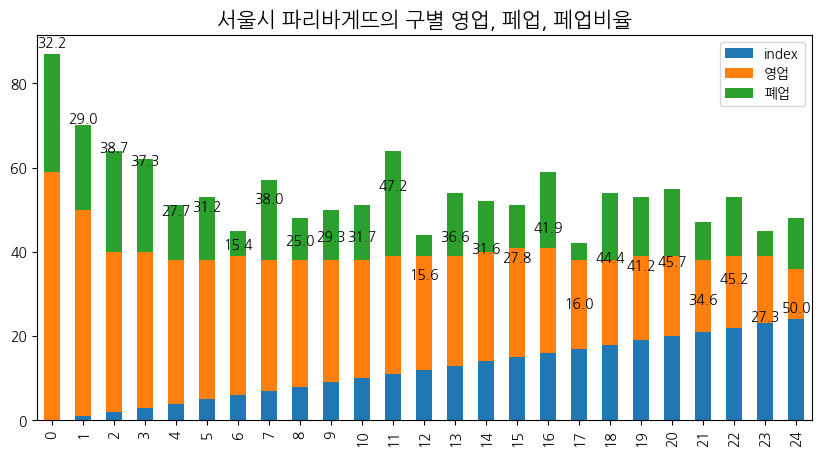

In [584]:
# [4-40] 누적 bar 그래프 그리기
import koreanize_matplotlib
data = temp2.iloc[:, :-1]
data = data.reset_index()
data.plot.bar(figsize=(10, 5), stacked=True, xlabel='')
y = temp2['폐업비율']
pos = data['영업'] + data['폐업']
for i, v in enumerate (range (25)) :
  plt.text(v, pos[i]+1, round(y[i],1),
           fontsize = 10,
           color='black',
           horizontalalignment='center' , # (left, center, right)
           verticalalignment='bottom') # (top, center, bottom)
plt.title('서울시 파리바게뜨의 구별 영업, 페업, 페업비율', fontsize=15)
plt.show()

In [593]:
# [4-41] bread를 사용하여 은평구에서 영업 중인 동별 빵집 개수를 구해 봅니다
temp = bread[(bread['구명']=='은평구') & (bread['상태코드'] == 1)]
s = temp['동명'].value_counts()
print(s)

동명
진관동    30
응암동    24
대조동    20
불광동    17
신사동    17
역촌동    16
갈현동    15
녹번동    12
구산동    11
증산동     8
수색동     3
Name: count, dtype: int64


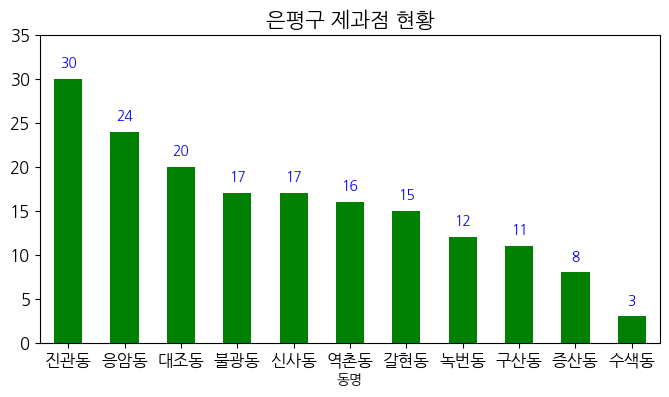

In [594]:
# [4-42] 은평구의 동별 빵집 개수를 그래프로 표시해 봅니다.
s.plot.bar(figsize=(8,4), rot=0, color= 'green')
plt.title('은평구 제과점 현황',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt. ylim(0, 35)
y = s.values
for i, v in enumerate(range(11)) :
  plt. text(v, y[i]+1, round (y[i], 1),
            fontsize = 10,
            color='blue',
            horizontalalignment='center' , # (left, center, right)
            verticalalignment='bottom') # (top, center, bottom)
plt. show()

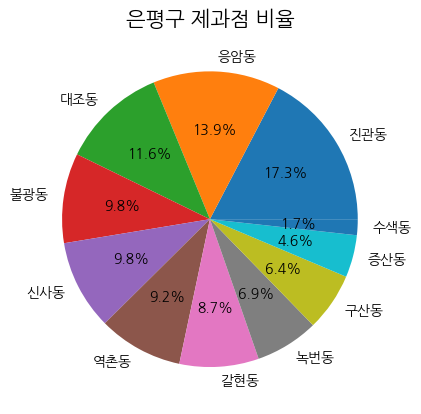

In [595]:
# [4-43] 은평구의 동별 빵집 비율을 원행 그래프로 표시해 봅니다.
s.plot.pie(label='', autopct='%.1f%%')
plt.title('은평구 제과점 비율', fontsize=15)
plt .show()

In [ ]:
"파리바게뜨, 은평구 성공적!"